<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/ML_Class_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info>=(3,5)
import sklearn
assert sklearn.__version__>="0.20"
import numpy as np
import pandas as pd
import os
np.random.seed(42)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import datasets

In [ ]:
import warnings
warnings.filterwarnings(action="ignore",message="^internal gesld")
PROJECT_ROOT_DIR=" "
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,"images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_first(fig_id,tight_layout=True,fig_extension="png",resolution=300):
  path=os.path.join(IMAGES_PATH,fig_id + "," + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
iris=datasets.load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int)

<ipython-input-31-b07e516a86d8>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=(iris.target==0).astype(np.int)


In [ ]:
per_clf=Perceptron()
per_clf.fit(X,y)

Perceptron()

In [ ]:
y_pred = per_clf.predict([[2,0.5]])
y_pred

array([0])

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
keras.__version__

'2.12.0'

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full),(X_test, y_test)=fashion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid, y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.

(-0.5, 27.5, 27.5, -0.5)

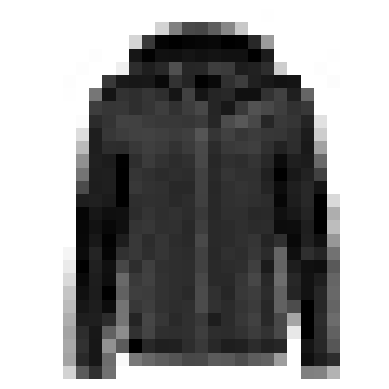

In [ ]:
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
             "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
X_valid.shape


(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

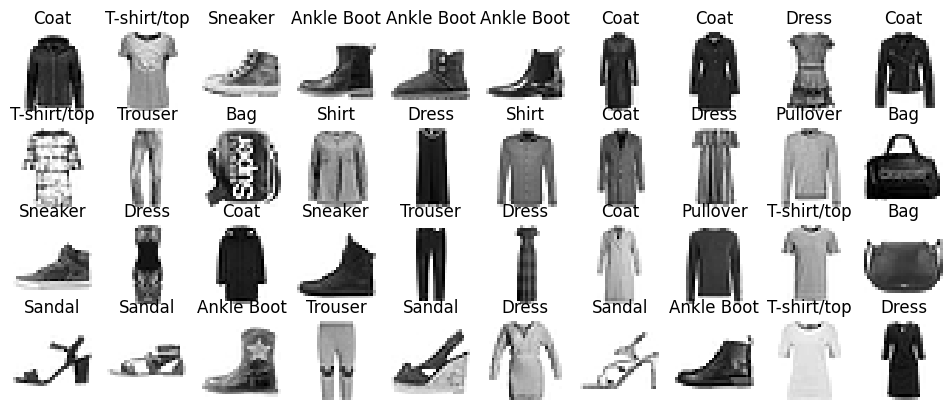

In [ ]:
n_rows=4
n_cols=10

plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index=n_cols*row+col
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.2)


In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
def relu(z):
  return np.maximum(0,z)
def derivative(f, z, eps=0.000001):
  return(f(z+eps)-f(z-eps))/(2*eps)

(-5.0, 5.0, -0.2, 1.2)

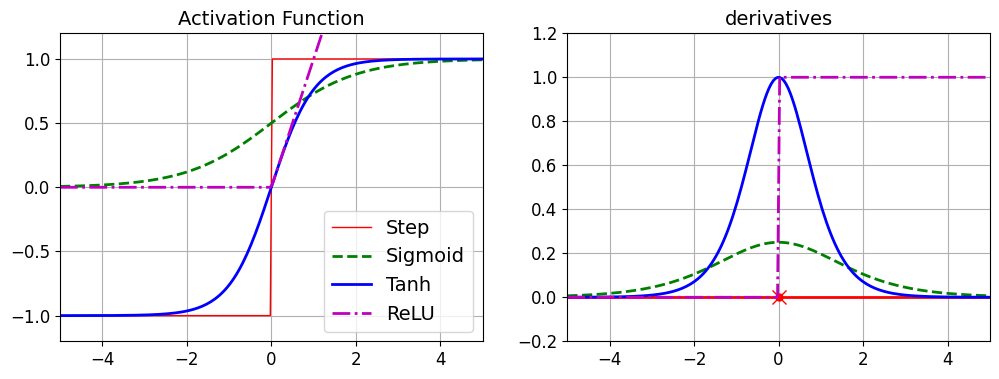

In [ ]:
z=np.linspace(-5,5,200)
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="best", fontsize=14)
plt.title("Activation Function", fontsize=14)
plt.axis([-5,5,-1.2,1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0,0,"ro",markersize=5)
plt.plot(0,0,"rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("derivatives", fontsize=14)
plt.axis([-5,5,-0.2,1.2])

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


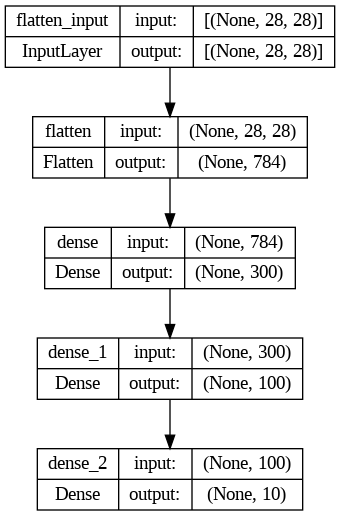

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1=model.layers[1]
hidden1

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases=hidden1.get_weights()
weights

array([[-0.01769754, -0.01296687, -0.03889177, ...,  0.01964732,
         0.06091027, -0.05551663],
       [ 0.02477483,  0.01250148, -0.05307145, ..., -0.04199721,
        -0.03334901, -0.03398149],
       [ 0.01258095, -0.02223378,  0.01338924, ...,  0.0560229 ,
         0.06941597, -0.00813791],
       ...,
       [-0.06417499,  0.00748695,  0.00776546, ...,  0.00960703,
         0.01952211,  0.02990951],
       [-0.05862478,  0.0020007 ,  0.05612689, ...,  0.04452577,
        -0.0005288 , -0.0420984 ],
       [-0.03799776,  0.01888634, -0.01055816, ..., -0.01574756,
        -0.04054767, -0.02916963]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_crossentropy])

In [ ]:
history=model.fit(X_train, y_train, epochs=30,
                  validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7191 - sparse_categorical_crossentropy: 0.7191 - val_loss: 0.5166 - val_sparse_categorical_crossentropy: 0.5166
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4850 - sparse_categorical_crossentropy: 0.4850 - val_loss: 0.4328 - val_sparse_categorical_crossentropy: 0.4328
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4394 - sparse_categorical_crossentropy: 0.4394 - val_loss: 0.5332 - val_sparse_categorical_crossentropy: 0.5332
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4131 - sparse_categorical_crossentropy: 0.4131 - val_loss: 0.3942 - val_sparse_categorical_crossentropy: 0.3942
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3954 - sparse_categorical_crossentropy: 0.3954 - val_loss: 0.3759 - val_sparse_categorical_crossentropy: 0.3759
Epoch 6/30
1719/1719 [============================

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_crossentropy', 'val_loss', 'val_sparse_categorical_crossentropy'])

(0.0, 1.0)

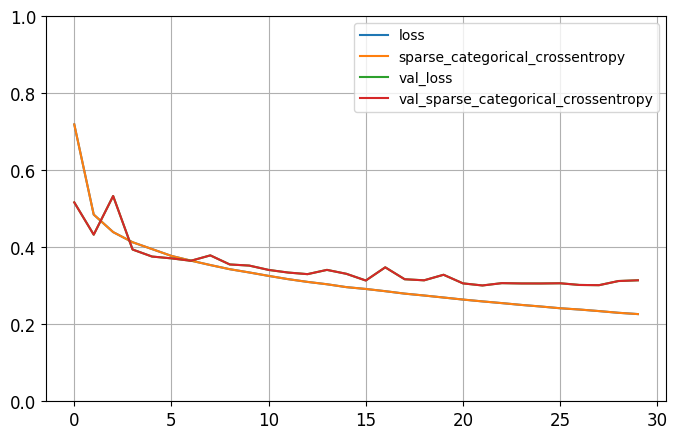

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3479 - sparse_categorical_crossentropy: 0.3479


[0.3479423224925995, 0.3479423224925995]

In [ ]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 100ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
predictions = model.predict(X_new)
y_pred=np.argmax(predictions, axis=1)
y_pred

1/1 [==============================] - 0s 23ms/step


array([9, 2, 1])

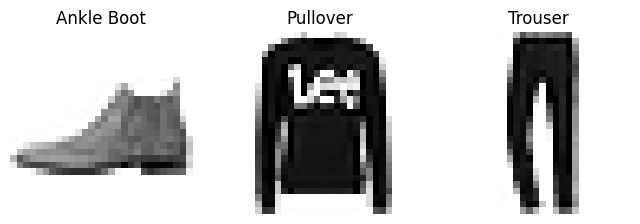

In [ ]:
plt.figure(figsize=(8,2.4))
for index, image in enumerate(X_new):
  plt.subplot(1,3,index+1)
  plt.imshow(image, cmap="binary", interpolation="nearest")
  plt.axis("off")
  plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.2)